In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
# import seaborn as sns

#### Heatmap of row as users, columns as features, colored by P,E,N, where row is clustered by subject area.

In [3]:
df = pd.read_csv("PENFeature.csv").fillna(0)
user_idxs = 9 # user index up to 9th user

In [4]:
cols = list(df.columns)
cols.remove("User ID")

In [5]:
fdf = df[cols].ix[:user_idxs-1]

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [6]:
# fdf[fdf==0]=1
fdf[fdf=="P"]=3
fdf[fdf=="E"]=2
fdf[fdf=="N"]=1

In [7]:
fdfarr=fdf.as_matrix().astype(int)

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
subject =["astro","genetics","matsci"]

In [9]:
fdfarr=fdfarr.T

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


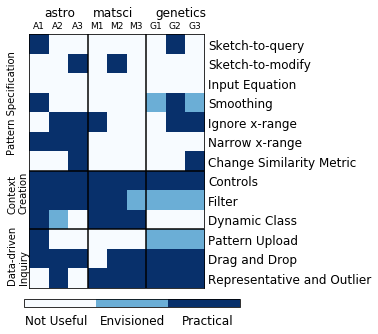

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig , ax = plt.subplots()
cmap = cm.get_cmap('Blues',3) 
im=plt.imshow(fdfarr,interpolation="nearest",cmap=cmap,vmin=1,vmax=3)
# cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.8]) 
#cbar = plt.colorbar(cax = cbaxes)
# cbar = plt.colorbar(location='bottom')

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("bottom", size="5%", pad=0.05)
pos=fig.add_axes([0.2,-0.03,0.5,0.03])
cbar = fig.colorbar(im,cax=pos, orientation='horizontal')
#cbar = fig.colorbar(im,fraction=0.05, ticks=[0,1,2], orientation='horizontal', pad=0.04) 
# cbar = plt.colorbar(orientation="horizontal")

ax.yaxis.set_ticks(range(len(cols)))
ax.set_yticklabels(cols,rotation=0,fontsize=12)
# ax.set_xticks([1,4,7])
ax.xaxis.tick_top()
# ax.set_xticklabels(subject,fontsize=12)
ax.set_xticks([0.,1,2,3,4,5,6,7,8])
ax.set_xticklabels(['A1','A2','A3','M1','M2','M3','G1','G2','G3'],fontsize=9)
ax.text(0.3,-1.4,"astro",fontsize=12)
ax.text(2.8,-1.4,"matsci",fontsize=12)
ax.text(6,-1.4,"genetics",fontsize=12)
ax.hlines(6.5,ax.get_xlim()[0],ax.get_xlim()[1])
ax.hlines(9.5,ax.get_xlim()[0],ax.get_xlim()[1])

ax.vlines(2.55,ax.get_ylim()[0],ax.get_ylim()[1])
ax.vlines(5.5,ax.get_ylim()[0],ax.get_ylim()[1])

cbar.ax.get_xaxis().set_ticks([])
for j, lab in zip([0.15,0.5,0.85],['Not Useful','Envisioned','Practical']):
    cbar.ax.text(j,-1.5, lab, ha='center', va='center',rotation=0,fontsize=12)

ax.text(-1.6,0.75,"Pattern Specification",fontsize=10,rotation=90)
ax.text(-1.6,7.5,"Context\nCreation",fontsize=10,rotation=90)
ax.text(-1.6,10.3,"Data-driven\nInquiry",fontsize=10,rotation=90)
ax.yaxis.tick_right()

ax.tick_params(axis=u'both', which=u'both',length=0)
fig.tight_layout()
fig.savefig("PENcoding.pdf", bbox_inches = 'tight')